In [13]:
from uncertainties import ufloat
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit


a = ufloat(  1.4135193362947e+01,   3.7908098559707e-01    )
k = ufloat( -2.7637823738730e-04 , 1.0801533256118e-05    )
# 3 = k*x + a
x = (3 - a) / k
x

40289.68947849104+/-2088.2330877248282

<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Admin\AppData\Local\Temp\ipykernel_15440\3224759377.py:38: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log_{10} f$ ')


     f[Hz]      U0         Z                1        f   gain_db
13  29,000  4.1050  1.970715  167,597.3824256  29000.0 -0.128122
12  31,000  3.9185  1.881181   85,875.1207267  31000.0 -0.531988
11  32,000  3.8207  1.834229  73,622.56459366  32000.0 -0.751527
10  33,000  3.7311  1.791215  66,438.88056323  33000.0 -0.957648
9   34,000  3.6334  1.744311  60,612.32605319  34000.0 -1.188121
8   35,000  3.5300  1.694671  55,844.66144524  35000.0 -1.438891
7   36,000  3.3272  1.597312  47,776.96246776  36000.0 -1.952807
6   37,000  3.2470  1.558809  46,028.75805425  37000.0 -2.164740
5   38,000  3.1668  1.520307  44,457.30172465  38000.0 -2.381973
4   39,000  3.0670  1.472396  42,424.84890351  39000.0 -2.660110
2   41,000  2.9623  1.422132  41,463.00561549  41000.0 -2.961805
1   42,000  2.8461  1.366347  39,292.06743956  42000.0 -3.309382
0   42,800  2.8060  1.347096  39,001.67798908  42800.0 -3.432632
3   43,000  2.7660  1.327892  38,179.24505146  43000.0 -3.557342
23  45,000  2.6800  1.286

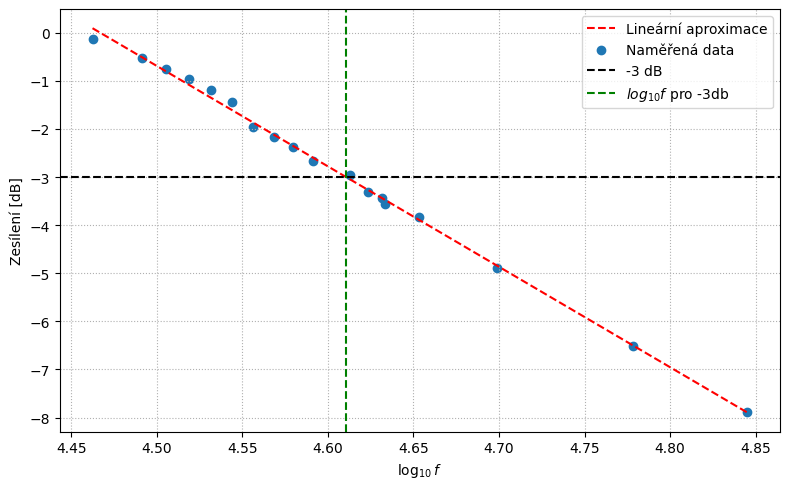

-3 dB pokles nastává při frekvenci ≈ 40792.12+/-7191.05 Hz


In [62]:
df = pd.read_csv('data.csv')
df.rename(columns={'ln (A)': 'f', "F [Hz]" : "gain_db"}, inplace=True)
df.dropna(inplace=True)
df.sort_values(by='f', ascending=True, inplace=True)
df['f'] = df['f'].str.replace(',', '').astype(float)

print(df)

# Najdi maximum a cíl (-3 dB)
df['gain_db'] = df['gain_db'] 

df['f']= np.log10(df['f'])


gain_db = df['gain_db'].values
frequencies = df['f'].values


def linear_fit(x, a, b):
    return a * x + b

popt, pcov= curve_fit(linear_fit, df['f'], df['gain_db'])
a, b = popt
print(pcov) 
a = ufloat(a, np.sqrt(pcov[0][0]))
b = ufloat(b, np.sqrt(pcov[1][1]))
#0 = a*x + b
x = (-3-b) / a
interp_fc = x.nominal_value

# Vykreslení
plt.figure(figsize=(8, 5))
plt.plot(frequencies, a.nominal_value * frequencies + b.nominal_value, 'r--', label='Lineární aproximace')
plt.scatter(frequencies, gain_db, label='Naměřená data')
plt.axhline(y=-3, color='k', linestyle='--', label='-3 dB')
plt.axvline(x=interp_fc, color='g', linestyle='--', label='$log_{10} f$ pro -3db')

plt.xlabel('$\log_{10} f$ ')
plt.ylabel('Zesílení [dB]')
plt.legend()
plt.grid(True, which='both', ls=':')

plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

x = 10**x

print(f"-3 dB pokles nastává při frekvenci ≈ {x:.2f} Hz")



In [63]:
B = ufloat(    -1.0246294174615e+01 , 4.8500640387877e-03 )
A =ufloat(2.0242572086,7.95336169e-4)
B/2, A

(-5.1231470873075+/-0.00242503201939385, 2.0242572086+/-0.000795336169)